## DocBank

In [1]:
import json 
import itertools
from collections import Counter

In [2]:
subset = 'train'

In [3]:
with open(f"data/DocBank/grouped-v3/{subset}-token.json", "r") as fp: 
    res = json.load(fp)

In [12]:
all_fonts = list(itertools.chain.from_iterable(ele['fonts'] for ele in res['data']))
unique_fonts = set(all_fonts)
all_unique_fonts = {}
all_unique_fonts['train'] = unique_fonts

In [17]:
for subset in ['dev', 'test']:
    with open(f"data/DocBank/grouped-v3/{subset}-token.json", "r") as fp: 
        res2 = json.load(fp)
    
    all_fonts2 = list(itertools.chain.from_iterable(ele['fonts'] for ele in res2['data']))
    unique_fonts2 = set(all_fonts2)
    all_unique_fonts[subset] = unique_fonts2

{'0': 'paragraph',
 '1': 'title',
 '2': 'equation',
 '3': 'reference',
 '4': 'section',
 '5': 'list',
 '6': 'table',
 '7': 'caption',
 '8': 'author',
 '9': 'abstract',
 '10': 'footer',
 '11': 'date',
 '12': 'figure'}

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline

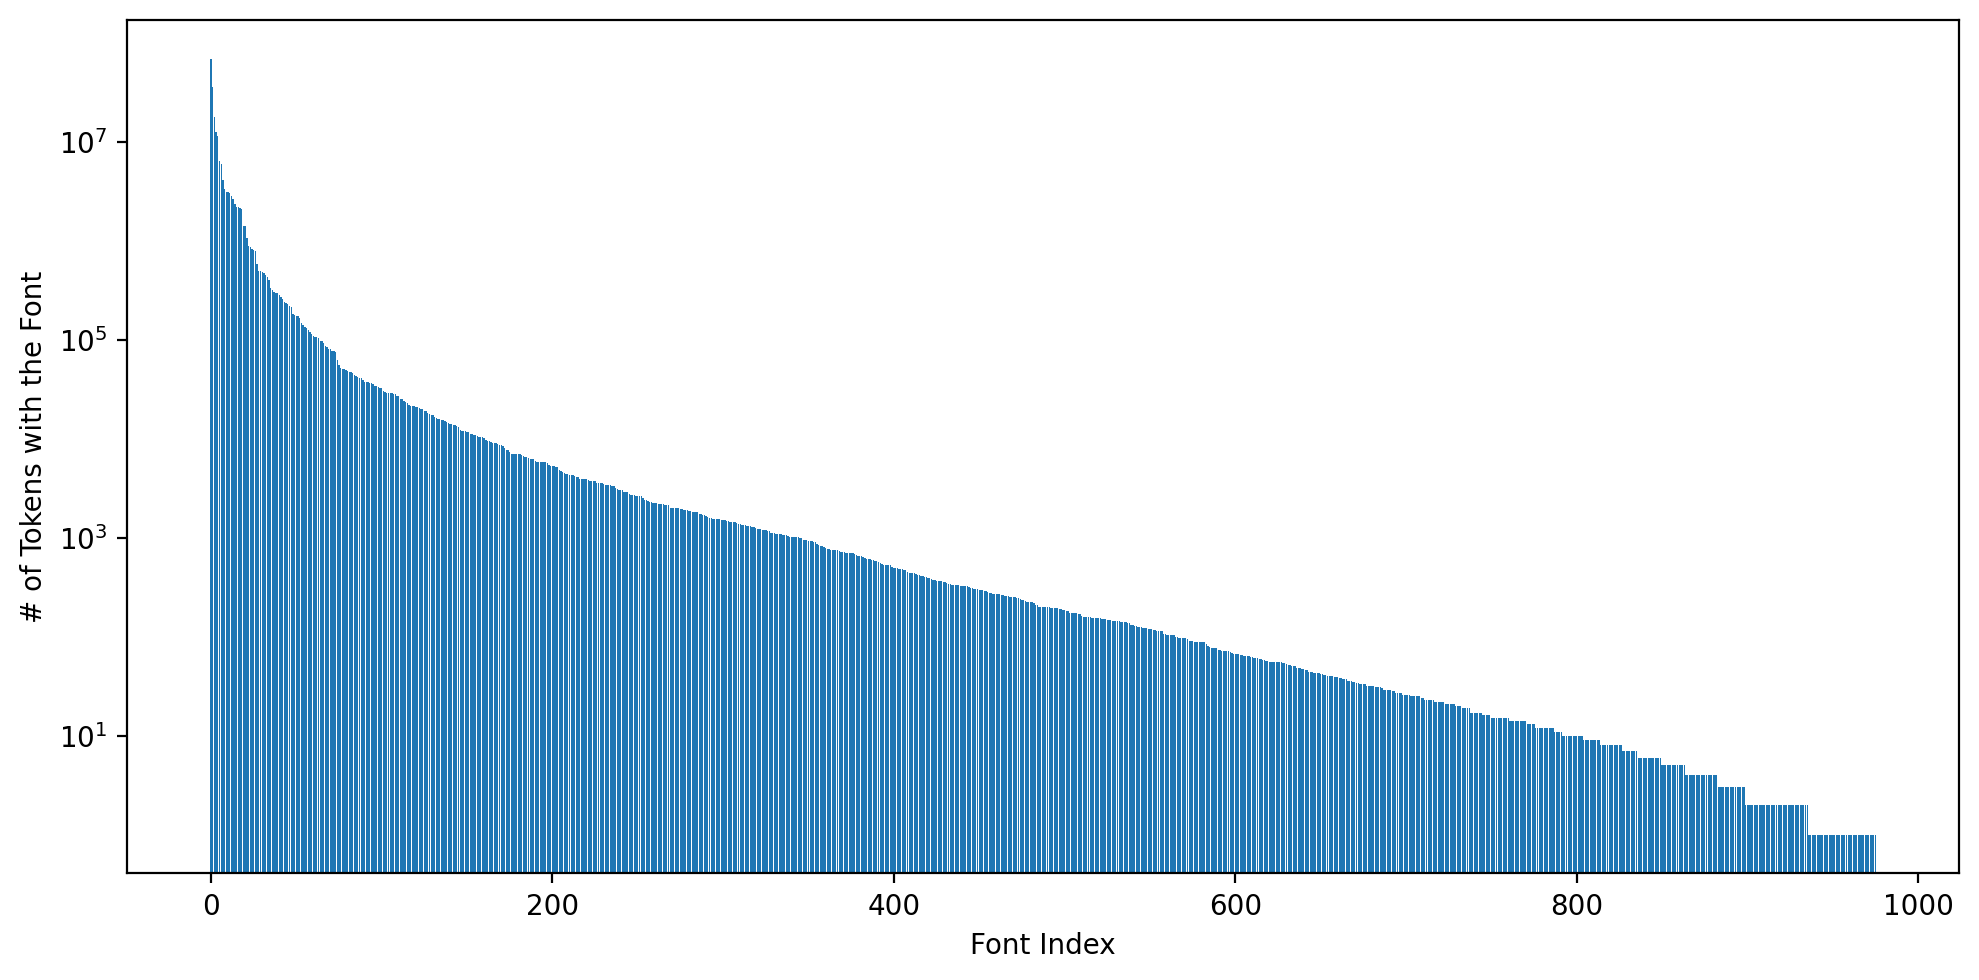

In [47]:
# plt.bar(list(font_statas.keys())[:100], list(font_statas.values())[:100])

plt.figure(figsize=(10,5), dpi=200)
plt.bar(range(len(font_statas)), sorted(font_statas.values(),reverse=True))
plt.yscale('log')
plt.xlabel('Font Index')
plt.ylabel('# of Tokens with the Font')
plt.tight_layout()
plt.savefig('font-stats.png')


In [31]:
font_statas = Counter(all_fonts)

In [58]:
font_names_that_appear_less_2_times = [name for name, value in font_statas.items() if value<=2 ]    
font_names_that_appear_more_than_2_times = [name for name, value in font_statas.items() if value>2 ]    

In [61]:
len(font_names_that_appear_more_than_2_times)

899

In [64]:
len([ele for ele in all_unique_fonts['dev'] if ele not in font_names_that_appear_more_than_2_times])

27

In [66]:
len(all_unique_fonts['dev'])

689

In [70]:
with open('font-vocab.txt', 'w') as fp:
    fp.write('\n'.join(font_names_that_appear_more_than_2_times))

In [85]:
sys.path.append("/net/nfs2.corp/s2-research/shannons/projects/2102_SPPv2/scienceparseplus/src")

from scienceparseplus.datasets.docbank import * 

In [ ]:
dataset = DocBankDataset('data/DocBank/')

In [ ]:
file_path = (
    f"data/DocBank/DocBank_500K_token_block/{cur_file.replace('.txt','.csv')}"
)

In [84]:
p = res2['data'][2]
for i in range(len(p['words'])):
    print(p['words'][i][:6], '\t', res2['labels'][str(p['labels'][i])], '\t', p['fonts'][i])

large 	 paragraph 	 CMR9
number 	 paragraph 	 CMR9
of 	 paragraph 	 CMR9
integr 	 paragraph 	 CMR9
points 	 paragraph 	 CMR10
integr 	 paragraph 	 CMR10
is 	 paragraph 	 CMR10
achiev 	 paragraph 	 CMR10
throug 	 paragraph 	 CMR10
classi 	 paragraph 	 CMR10
ESB 	 paragraph 	 CMR10
(Enter 	 paragraph 	 CMR10
Servic 	 paragraph 	 CMR10
Bus) 	 paragraph 	 CMR10
- 	 paragraph 	 CMR10
type 	 paragraph 	 CMR10
system 	 paragraph 	 CMR10
[8], 	 paragraph 	 CMR10
MOM 	 paragraph 	 CMR10
(Messa 	 paragraph 	 CMR10
Middle 	 paragraph 	 CMR10
ware) 	 paragraph 	 CMR10
system 	 paragraph 	 CMR10
[9], 	 paragraph 	 CMR10
system 	 paragraph 	 CMR10
based 	 paragraph 	 CMR10
on 	 paragraph 	 CMR10
EIP 	 paragraph 	 CMR10
(Enter 	 paragraph 	 CMR10
Integr 	 paragraph 	 CMR10
Patter 	 paragraph 	 CMR10
[11] 	 paragraph 	 CMR10
or 	 paragraph 	 CMR10
throug 	 paragraph 	 CMR10
the 	 paragraph 	 CMR10
orches 	 paragraph 	 CMR10
of 	 paragraph 	 CMR10
servic 	 paragraph 	 CMR10
throug 	 paragraph 	 CMR10
c

## PubLayNet

In [1]:
import json 
import itertools
from collections import Counter

In [3]:
all_unique_fonts = {}

for subset in ['dev', 'train']:
    with open(f"../datasets/publaynet/converted/grouped-v1/{subset}-token.json", "r") as fp: 
        res = json.load(fp)
    
    all_fonts = list(itertools.chain.from_iterable(ele['fonts'] for ele in res['data']))
    unique_fonts = set(all_fonts)
    all_unique_fonts[subset] = unique_fonts

['TTA2036A08t00',
 'TT3D8o00',
 'TT4BBo00',
 'TT4C2o00',
 'Osaka-83pv-RKSJ-H',
 'TTA2053F68t00',
 'MSTT311dfa7b48O09406402',
 'MSTT3156be3b9fO05401700',
 'TTE97o00',
 'TT41DEo00',
 'GraphicSabon-Bold',
 'TT6D61o00',
 'FencesPlain',
 'TTF96o00',
 'AdvTNBI',
 'TT1CB42o00',
 'AdvDM7',
 'AdvP4069D',
 'AdvGreekB-OV-NJDGGB',
 'AdvPS586D-OV-VJDGGB',
 'AdvPS3F926E-OV-XJDGGB',
 'AdvPS586D-OV-GDODWB',
 'AdvPS7CFD-OV-IDODWB',
 'AdvPS586D-OV-JQFEWB',
 'AdvPS586D-OV-RQXSUA',
 'AdvPS586D-OV-XQAMYA',
 'AdvPS7CFD-OV-ARAMYA',
 'AdvPS7DB7-OV-CRAMYA',
 'TTED21o00',
 'TTED23o00',
 'Webdings-Identity-H',
 'PMingLiU-Identity-H',
 'AdvT040',
 'AdvP48FEC7',
 'Math3',
 'AdvP7CA6',
 'AdvSymbolMT',
 'EPSSymbol-Oblique',
 'GadgetRegular',
 'TimesNewRomanBdItMS',
 'AdvMathSymb-OV-TGLNOC',
 'AdvPS586D-OV-VGLNOC',
 'TT63Do00',
 'TT63Fo00',
 'TT640o00',
 'TT644o00',
 'TT645o00',
 'TT647o00',
 'TT648o00',
 'TT656o00',
 'TT657o00',
 'TT658o00',
 'TT659o00',
 'TT65Ao00',
 'TT660o00',
 'TT661o00',
 'TT667o00',
 'TT668o00

In [4]:
font_statas = Counter(all_fonts)

In [7]:
plt.figure(figsize=(10,5), dpi=200)
plt.bar(range(len(font_statas)), sorted(font_statas.values(),reverse=True))
plt.yscale('log')
plt.xlabel('Font Index')
plt.ylabel('# of Tokens with the Font')
plt.tight_layout()
# plt.savefig('font-stats.png')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff60fb1bdc0> (for post_execute):


KeyboardInterrupt: 

In [14]:
with open('font-vocab.txt', 'r') as fp:
    orig_fonts = fp.read().strip().split('\n')

In [23]:
len(orig_fonts)

899

In [17]:
new_fonts = [name for name, value in font_statas.items() if value<=2 ]

In [54]:
len(set(orig_fonts).intersection(set(new_fonts)))

18

In [45]:
import fuzzysearch
from tqdm import tqdm 

In [ ]:
' '.join(new_fonts)

In [51]:
context = ' '.join(new_fonts)

In [30]:
context = ' '.join(new_fonts)

In [50]:
len(new_fonts)

55070

In [46]:
mutual_fonts = []
for font in tqdm(orig_fonts):
    for new_font in new_fonts:
        res = fuzzysearch.find_near_matches(font, new_font, max_l_dist=1)
        if res!=[]:
            mutual_fonts.append(new_font)
            break

100%|██████████| 899/899 [07:34<00:00,  1.98it/s]


In [48]:
len(mutual_fonts)

159

In [33]:
for font in orig_fonts:
    res = fuzzysearch.find_near_matches(
            font,
            context,
            max_l_dist=5,
        )
    if res != []:
        print(res)
        break

KeyboardInterrupt: 

In [57]:
new_fonts = [name for name, value in font_statas.items() if value<=2 ]
len(new_fonts)

55070

In [58]:
with open('font-vocab-publaynet.txt', 'w') as fp:
    fp.write('\n'.join(new_fonts))